<a href="https://colab.research.google.com/github/marinanastas/telegrams/blob/main/code/represent_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# С помощью данного кода мы проверяем репрезантативность маленького датасета относительно большого

## Загружаем большой датасет

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
fname = '/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/telegrams_alldates.xlsx'
df = pd.read_excel(fname)

## Присваиваем каждой телеграмме год отправки и по нему определяем эпоху

In [ ]:
cccp = {(1917, 1922):'Ленин', 
    (1923, 1940):'Сталин до войны',
    (1941, 1952):'Сталин после войны',
    (1953, 1964):'Оттепель',
    (1965, 1985):'Период застоя',
    (1986, 1991):'Перестройка'}

In [ ]:
def hist_assignment(date):
  period = ''
  year = ''
  if len(date.split('.')) !=3:
    period = '5_Не определено'
  else:
    year = date.split('.')[2]
    try: 
      int(year)
    except ValueError:
      period = '5_Не определено'
    if period == '':
      if int(year) > 1991:
        period = '4_РФ'
      elif int(year) > 1945:
        period = '3_СССР после войны'
      elif int(year) > 1917:
        period = '2_СССР до войны'
      else:
        period = "1_РИ"
    return period

In [ ]:
df['Исторический_период'] = df['date'].apply(hist_assignment) 
barplot = df['Исторический_период'].groupby(df['Исторический_период']).count()

## Повторяем те же действия с датасетом поменбше

In [ ]:
fname = '/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/БД все телеграммы_1.xlsx'
df_1 = pd.read_excel(fname)

In [ ]:
df['Исторический_период_1'] = df_1['date'].apply(hist_assignment)
barplot1 = df['Исторический_период_1'].groupby(df['Исторический_период_1']).count()

## Графики: большой датасет, маленький датасет, соотношение между маленьким и большим

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
barplot.index
barplot

Исторический_период
1_РИ                   9558
2_СССР до войны       13079
3_СССР после войны    50405
4_РФ                   3896
5_Не определено       16307
Name: Исторический_период, dtype: int64

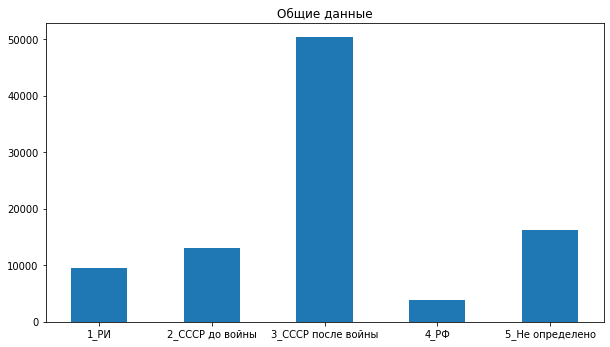

In [ ]:
plt.get_cmap("viridis")
plt.rcParams["figure.figsize"] = (10,5.5)
X = barplot.index
Y = barplot
fig, ax = plt.subplots()
ax.bar(X,Y, width = 0.5)
ax.set_title('Общие данные')
fig.show()
plt.savefig('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/general_data')

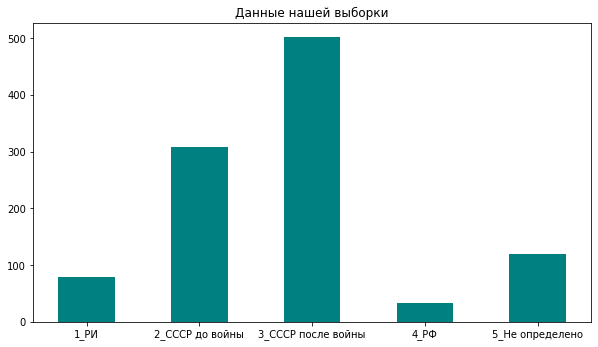

In [ ]:
plt.get_cmap("viridis")
plt.rcParams["figure.figsize"] = (10,5.5)
X = barplot1.index
Y = barplot1
fig, ax = plt.subplots()
ax.bar(X,Y, width = 0.5, color = '#008080')
ax.set_title('Данные нашей выборки')
fig.show()
plt.savefig('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/local_data')

In [ ]:
new_data= pd.concat([barplot, barplot1], axis=1)
new_data['Разность'] = new_data['Исторический_период'] - new_data['Исторический_период_1']
new_data

,Исторический_период,Исторический_период_1,Разность
1_РИ,9558,79,9479
2_СССР до войны,13079,309,12770
3_СССР после войны,50405,502,49903
4_РФ,3896,34,3862
5_Не определено,16307,119,16188


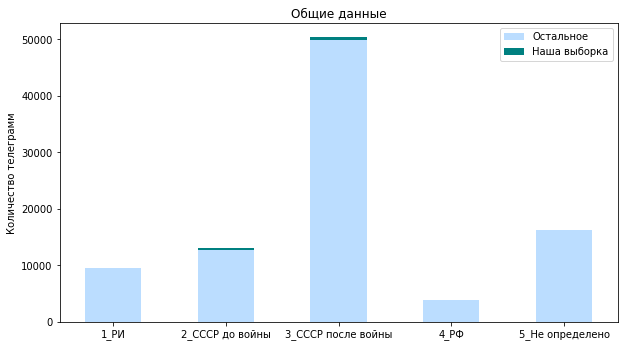

In [ ]:
fig, ax = plt.subplots()
width = 0.5

ax.bar(new_data.index, new_data['Разность'], width, label='Остальное', color = '#bbddff')
ax.bar(new_data.index, new_data['Исторический_период_1'], width, bottom=new_data['Разность'],
       label='Наша выборка', color = '#008080')

ax.set_ylabel('Количество телеграмм')
ax.set_title('Общие данные')
ax.legend()

fig.show()
plt.savefig('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/data_comparison')